In [617]:
import numpy as np
import pandas as pd
from scipy.optimize import root
import matplotlib.pyplot as plt
import seaborn as sns

In [618]:
Na = 6.5E16
dEg = 1.42
dEa = 0.031
k = 8.62E-5
mdn = 0.067
mdp = 0.45
m0 = 9.1E-31
Nc = 4.7E17
Nv = 8.0E18
Mn = 8000
Mp = 400
ni =  1.8E6
e = 13.1
q = 1.9E-19

In [619]:
def Nc(T):
    return 4.82*10**15*(T**1.5)*(mdn**1.5)
def Nv(T):
    return 4.82*10**15*(T**1.5)*(mdp**1.5)
def Eg(T):
    return 1.521 - (8.871e-4*T**2)/(T+572)
def ni(T):
    return np.sqrt(Nc(T)*Nv(T))*np.exp(-Eg(T) / (2 * k * T))

## Зависимость ln(p) = f(1/T)
### Находим переход

In [620]:
t1 = 50.0
t2 = 1500.0
def f1(T):
    return (Na/Nv(T))*np.exp(dEa/(k*T)) - 3
def f2(T):
    return (ni(T)/np.sqrt(2)) - Na

In [621]:
res1 = root(f1, t1)
res2 = root(f2, t2)

print(res1.x, res2.x);

[89.13801504] [1070.34135899]


#### T1 = 89.14 -  температура перехода от области ионизации к области истощения примеси
#### T2 = 1070.34 - температура перехода от области истощения к собственной проводимости

In [622]:
T1 = res1.x
T2 = res2.x
T0 = (T1+T2)/2

In [623]:
T0

array([579.73968701])

In [624]:
def p1(T):
    return (Nv(T)/4)*np.exp(-dEa/(k*T)) * (np.sqrt(1 + (8*Na / Nv(T)) * np.exp(dEa/(k*T))) - 1)
def p2(T):
    return (Na/2)*(1+np.sqrt(1+(4*ni(T)**2)/(Na**2)))
def p(T):
    return p1(T) if (T < T1).any() else p2(T)

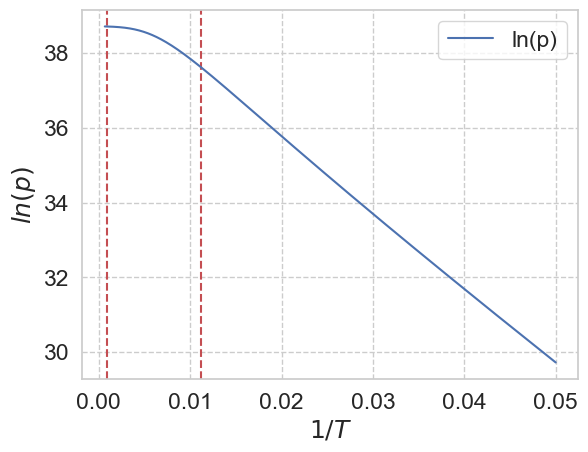

In [625]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.axvline(1/T1, color='r', linestyle='--')
plt.axvline(1/T2, color='r', linestyle='--')


T = np.linspace(20, 1500, 1000)
plt.plot(1/T, np.log(p(T)), label='ln(p)')
plt.xlabel(r'$1/T$')
plt.ylabel(r'$ln(p)$')
plt.legend()



plt.show()

#### Проверка на вырожденность

In [626]:
Nakr = 10**22.5 * mdp**1.5 * dEa**1.5

In [627]:
if Nakr < Na:
    print('пп вырожденный')
else:
    print('пп невырожденный')

пп невырожденный


## Зависимость F = f(T)

In [628]:
def Ec(T):
    return Eg(T) / 2
def Ev(T):
    return -Eg(T) / 2
def Ei(T):
    return 0 * T
def Ea(T):
    return Ev(T) + dEa

In [629]:
def Fi(T):
    return Ei(T) - k*T*np.log((mdp/mdn)**0.75)

In [630]:
def F1(T):
    return Ea(T) - k*T*np.log(0.25 * np.sqrt(1 + (8*Na/Nv(T))*np.exp(dEa/(k*T)) - 1))
def F2(T):
    return Ev(T) - k*T*np.log((Na/(2*Nv(T)))*(1 + np.sqrt(1 + (4*ni(T)**2)/(Na**2))))
def F(T):
    return F1(T) if (T < T1).any() else F2(T)

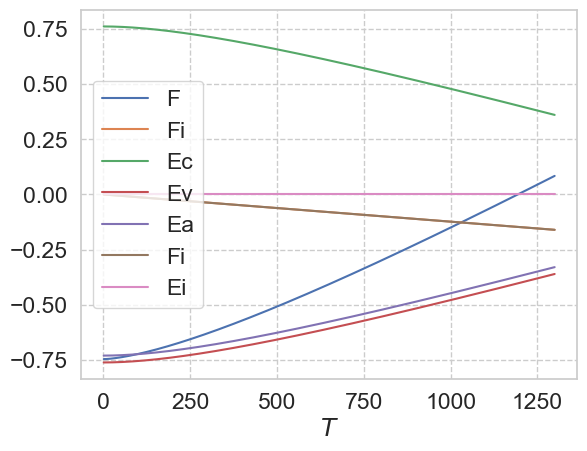

In [631]:
# draw plots of F1 F2 Fi Ec Ev Ea Fi F for T = 0..1000
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
T = np.linspace(1, 1300, 1000)
plt.plot(T, F(T), label='F')
plt.plot(T, Fi(T), label='Fi')
plt.plot(T, Ec(T), label='Ec')
plt.plot(T, Ev(T), label='Ev')
plt.plot(T, Ea(T), label='Ea')
plt.plot(T, Fi(T), label='Fi')
plt.plot(T, Ei(T), label='Ei')
plt.legend()
plt.xlabel(r'$T$')
plt.show();

#### Находим Tmin и Fmin

In [632]:
Tmin = 8.15 * (1/mdp) * (Na/10E18)**(2/3)
print(Tmin)

0.6307936789804817


In [633]:
Fmin = (Ev(Tmin) + Ea(Tmin))/2 + 5.3e-4 * (1/mdp) * (Na/10E18)**(2/3)
print(Fmin)

-0.74495867085433


##### Tmin = 0.63 K
##### Fmin = -0.745 эВ

## M = f(T)

In [634]:
def Mip(T):
    return (3.68E20/Na)*(e/16)**2 * (T/300)**(3/2) * (np.sqrt(mdp) * np.log(1 + ((e/10)*(T/100)*(2.35E19/Na)**(1/3))**2))**(-1)
def Mtkr(T):
    return Mp*(T/300)**(-1.5)
def M(T):
    return ((1/Mip(T))+(1/Mtkr(T)))**(-1)

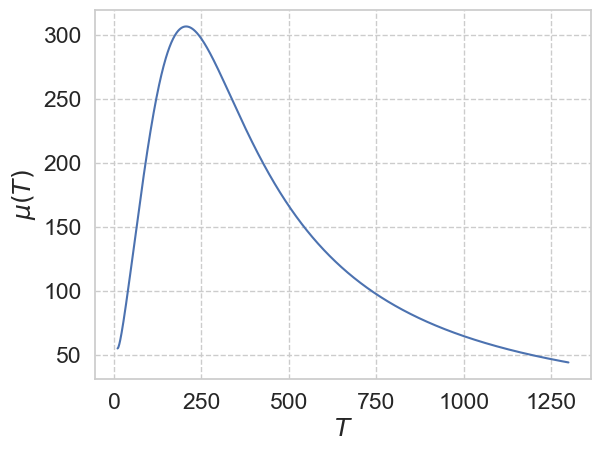

In [635]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
T = np.linspace(10, 1300, 1000)
plt.plot(T, M(T), label='M')
plt.xlabel(r'$T$')
plt.ylabel(r'$\mu(T)$')
plt.show();

## Электропроводность

In [636]:
def sigma(T):
    return e*M(T)*p(T)

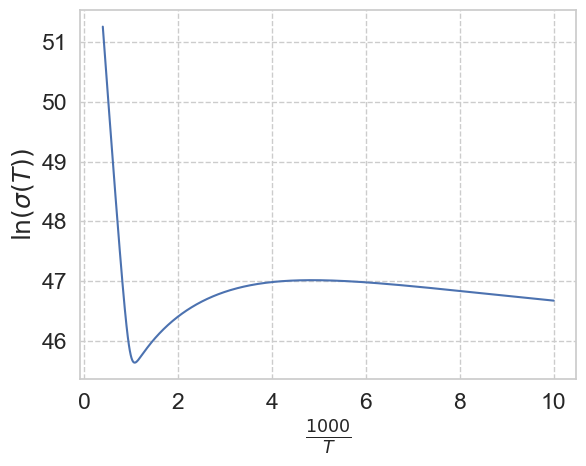

In [637]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
T = np.linspace(100, 2500, 1000)
plt.plot(1000/T, np.log(sigma(T)), label='sigma')
plt.xlabel(r'$\frac{1000}{T}$')
plt.ylabel(r'$\ln(\sigma(T))$')
plt.show();


In [638]:
Tconst = 300
k_si = 1.38064852e-23
Mp_si = Mp /10000
Na_si = Na * 1E6

In [639]:
M_300 = M(Tconst)
M_300_si = M_300 / 10000

In [640]:
print(M_300_si, 'м^2/В*с')

0.02718759863684943 м^2/В*с


In [641]:
sigma_300 = sigma(Tconst)
sigma_300_si = sigma_300 * 1E-18
print(sigma_300_si, 'Ом^-1*см^-1')

231.5024023927729 Ом^-1*см^-1


## Коэффициент Холла

Время релаксации

In [642]:
tau = Mp_si * (mdp * m0) / q
print(tau, 'c')

8.621052631578948e-14 c


Тепловая скорость

In [643]:
Vt = np.sqrt(3*k_si*Tconst/(mdp*m0))
print(Vt, 'м/с')

174195.07316937385 м/с


Длина свободного пробега

In [644]:
l = Vt * tau
print(l, 'м')

1.5017448939549177e-08 м


Критическая концентрация

In [645]:
Ncr = (np.pi * l / 4)**-3
print(Ncr, 'м^-3')

6.094553081221398e+23 м^-3


In [646]:
if Na_si < Ncr:
    print('Рассеяния на тепловых колебаниях решетки')

Рассеяния на тепловых колебаниях решетки


Холл фактор

In [647]:
A = 1.18

Коэффициент Холла

In [648]:
Rh = A/(Na_si*q)
print(Rh, 'м^3/Кл')

9.554655870445344e-05 м^3/Кл


Удельная теплопроводность

In [649]:
hi_r = 155
hi_el = sigma_300_si * (2 * k_si**2 * Tconst)/q**2
hi = hi_r + hi_el
print(hi, 'Вт/м*К')

155.00073344206453 Вт/м*К


Дифференциальная термоэдс

In [650]:
p_tkr = -0.5
print(Nv(300), 'см^-3')

7.560450790131499e+18 см^-3


Формула Писаренко

In [651]:
ap = (k_si/q)*(2.5 + p_tkr + np.log(Nv(300)/Na))
print(ap, 'В/К')

0.0004909512618185449 В/К


Вклад эффекта Эттингсгаузена в холловские измерения

In [652]:
U = 0.013 * (sigma_300_si * ap)/hi
print(U)

9.532426863941895e-06


In [653]:
T = np.linspace(10, 300, 30)

df = pd.DataFrame({'T, К': T, 'Eg(T), эВ': Eg(T), 'ni(T), см-3': ni(T), 'p(T), см-3': p(T), 'F(T), эВ': F(T), 'M(T), см2/(В*с)': M(T), 'sigma(T), Ом-1 см-1': sigma(T)})

In [654]:
df.head(10)

,"T, К","Eg(T), эВ","ni(T), см-3","p(T), см-3","F(T), эВ","M(T), см2/(В*с)","sigma(T), Ом-1 см-1"
0,10.0,1.520848,0.000000e+00,5.999776e+08,-0.744774,54.917743,4.316374e+11
1,20.0,1.520401,9.801102e-176,8.100284e+12,-0.743504,64.723569,6.868059e+15
2,30.0,1.519674,1.414834e-111,2.194832e+14,-0.741757,81.572758,2.345404e+17
3,40.0,1.518681,2.006882e-79,1.209294e+15,-0.739656,100.630535,1.594163e+18
4,50.0,1.517434,4.358070e-60,3.450714e+15,-0.737266,120.633856,5.453176e+18
5,60.0,1.515947,3.651474e-47,6.994034e+15,-0.734624,140.960646,1.291507e+19
6,70.0,1.514229,6.563983e-38,1.156267e+16,-0.731760,161.171873,2.441286e+19
7,80.0,1.512292,5.981006e-31,1.674390e+16,-0.728693,180.901466,3.967984e+19
8,90.0,1.510146,1.602274e-25,2.213007e+16,-0.725440,199.826726,5.793056e+19
9,100.0,1.507799,3.625781e-21,2.739248e+16,-0.722015,217.663194,7.810658e+19


In [655]:
df.to_csv('data.csv', index=False)